# A/B Testing of Personalized Email Marketing Campaigns

Hypothesis: Email campaigns with personalized messaging will increase conversion rate

## Business Goal: 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

marketing = pd.read_csv('data/marketing.csv')

In [3]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


Test allocation
The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

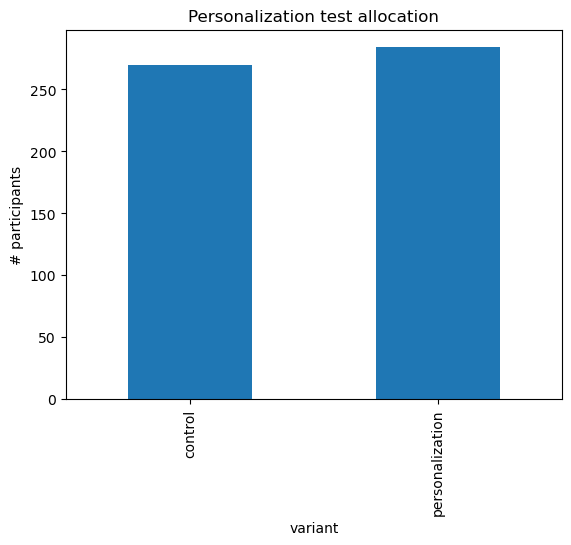

In [8]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

Comparing conversion rates
Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

The DataFrame email has been loaded in your workspace which contains only rows from the marketing DataFrame where marketing_channel is 'Email'.

In [36]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values and ensure numeric type
control = pd.to_numeric(subscribers_df['control'].dropna(), errors='coerce')
personalization = pd.to_numeric(subscribers_df['personalization'].dropna(), errors='coerce')

In [37]:
# Check for any remaining non-numeric types
print(f"Control data type: {control.dtype}")
print(f"Personalization data type: {personalization.dtype}")


Control data type: bool
Personalization data type: bool


In [38]:
# Print conversion rates
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


Creating a lift function
Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

 

The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

In [39]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


Yes, the results are statistically significant with p = 0.006.

In [41]:
from scipy.stats import ttest_ind

t = ttest_ind(control, personalization)

print(t)

Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182)


Building an A/B test segmenting function
In the previous lesson, you observed that your personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

Since you want to segment our data multiple times, you will build a function ab_segmentation() that analyzes the impact of your A/B tests on segments of data that you can reuse each time you want to conduct this kind of analysis.

Your function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

In [44]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = pd.to_numeric(subscribers_df['control'].dropna(), errors='coerce')
      personalization = pd.to_numeric(subscribers_df['personalization'].dropna(), errors='coerce')

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

Using your segmentation function
Now that you've generated an ab_segmentation() function, it's time to test it out.

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data scientist, it's your responsibility to enable your marketing stakeholders to target users according to their preferences.

We will run through two segments in our data that may be relevant to assessing the impact of our test.

When using the ab_segmentation() function, remember to input the column name in quotes (i.e., 'language_displayed')

In [45]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 38.85%
t-statistic: Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182) 


English
lift: 38.85%
t-statistic: Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182) 


German
lift: 38.85%
t-statistic: Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182) 


Spanish
lift: 38.85%
t-statistic: Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182) 




Finally, you analyzed an A/B test. You learned how to determine statistical significance and the importance of segmentation in A/B tests to understand the true impact of the change. You found that while the test was a success overall, personalization was not appreciated in certain regions and by certain age groups.